<a href="https://colab.research.google.com/github/pjdoucette/MAT422/blob/main/HW_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.4 Maximum Likelihood Estimation



---



Key Concepts:


*   MLE for Random Samples
*   Linear Regression

#### Set up

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.linear_model import LinearRegression



---



#### MLE for Random Samples

**Maximum Likelihood Estimation (MLE)** is a method of estimating the parameters of a probability distribution by maximizing a likelihood function. The **maximum likelihood estimate** is the point in the parameter space that mazimizes the likelihood function.

<br><br>
**Definition 2.4.1**

Let $X_1, X_2, \dots, X_n$ have joint pmf or pdf:

$$
f(x_1, x_2, \dots, x_n; \theta_1, \dots, \theta_m)
$$

where the parameters $\theta_1, \dots, \theta_m$ have unknown values. When $x_1, \dots, x_n$ are the observed sample values and the expression above is regarded as a function of $\theta_1, \dots, \theta_m$, it is called the **likelihood function**.

The maximum likelihood estimates (MLEs) $\hat{\theta}_1, \dots, \hat{\theta}_m$ are those values of the $\theta_i$'s that maximize the likelihood function, such that:

$$
f(x_1, \dots, x_n; \hat{\theta}_1, \dots, \hat{\theta}_m) \geq f(x_1, \dots, x_n; \theta_1, \dots, \theta_m) \text{ for all } \theta_1, \dots, \theta_m
$$

When the $X_i$'s are substituted in place of the $x_i$'s, the maximum likelihood estimators result.

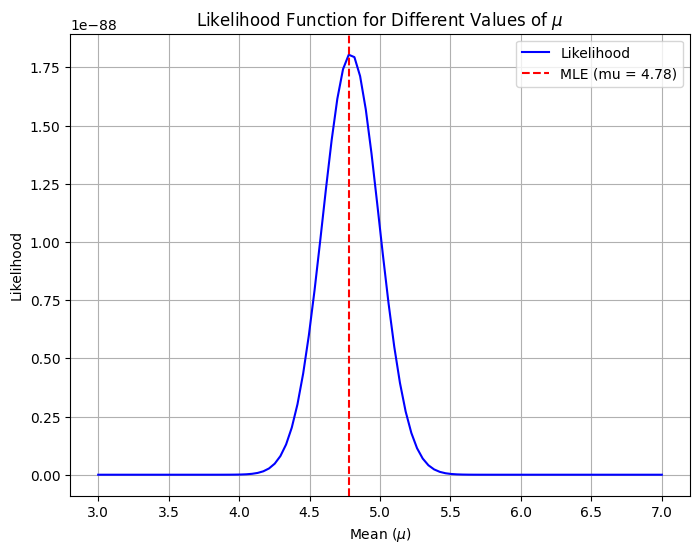

In [3]:
# Random data for normal dist
np.random.seed(42)
data = np.random.normal(loc=5, scale=2, size=100)

# Calculate the likelihood for a given mean and SD
def likelihood(mu, sigma, data):
    return np.prod(norm.pdf(data, loc=mu, scale=sigma))

# Range of mu values
mu_values = np.linspace(3, 7, 100)
sigma = 2

# Likelihood for each mu value
likelihoods = [likelihood(mu, sigma, data) for mu in mu_values]

# Find the MLE
mle_mu = mu_values[np.argmax(likelihoods)]

# Plot
plt.figure(figsize=(8, 6))
plt.plot(mu_values, likelihoods, label='Likelihood', color='blue')
plt.axvline(mle_mu, color='red', linestyle='--', label=f'MLE (mu = {mle_mu:.2f})')
plt.title('Likelihood Function for Different Values of $\mu$')
plt.xlabel('Mean ($\mu$)')
plt.ylabel('Likelihood')
plt.legend()
plt.grid(True)
plt.show()


#### Linear Regression

Given a set of data points $ \{(x_i, y_i)\}_{i=1}^{n} $, the goal is to fit an affine function to the data by finding coefficients $ \beta_j $ that minimize the sum of squared residuals:

$$
\sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

where $ \hat{y}_i $ is the predicted value based on the affine model.

From a probabilistic viewpoint, we assume that the data points are independently drawn from a normal distribution. The likelihood function for these points is the product of normal probability density functions, where:

$$
y_i \sim N(\hat{y}_i, \sigma^2)
$$

By maximizing the log likelihood, we find that the maximum likelihood estimate of $ \beta $ leads to the same minimization problem as the least squares method:

$$
\arg \min_\beta \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

This shows that the least squares approach is equivalent to maximum likelihood estimation.


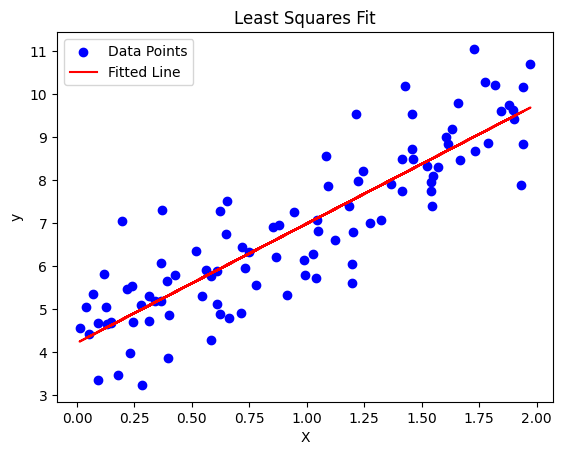

Intercept: 4.22
Slope: 2.77


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Random data for x and y
np.random.seed(42)
n = 100
X = 2 * np.random.rand(n, 1)
y = 4 + 3 * X + np.random.randn(n, 1)

# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Predict values of y
y_pred = model.predict(X)

# Plot
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Fitted Line')
plt.title('Least Squares Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Print  coefficients
print(f'Intercept: {model.intercept_[0]:.2f}')
print(f'Slope: {model.coef_[0][0]:.2f}')
